In [48]:
#import dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import gmaps
import os
import json
import pprint as pprint

In [49]:
sample_data = pd.read_csv('output_data/sample_300.csv')
sample_data.head()

,State,County,Returns Total,Total AGI,Outflow,Outflow AGI,Inflow,Inflow AGI,Net Inflow(Outflow),Flow(%),Unemployment Rate(%),1 Bed Average,2 Bed Average,Highest Marginal Income Tax Rate (%),Median Home Price 2017
0,VT,Essex County,2279,101084,177,5280,186,7537,9,0.395,3.6,645,823,8.75,134687
1,TX,Travis County,431303,49131355,47553,3238771,48623,3884317,1070,0.248,2.8,1104,1350,0.00,347488
2,FL,Suwannee County,12641,580805,1041,34681,1244,46573,203,1.606,3.7,597,686,0.00,100040
3,NH,Rockingham County,129670,13621666,9769,837564,10379,882097,610,0.470,2.8,1005,1269,0.00,352626
4,MS,Harrison County,65100,3559547,7495,300382,7574,323114,79,0.121,4.5,705,815,5.00,165728


In [50]:
sample_data.dtypes

State                                    object
County                                   object
Returns Total                             int64
Total AGI                                 int64
Outflow                                   int64
Outflow AGI                               int64
Inflow                                    int64
Inflow AGI                                int64
Net Inflow(Outflow)                       int64
Flow(%)                                 float64
Unemployment Rate(%)                    float64
1 Bed Average                             int64
2 Bed Average                             int64
Highest Marginal Income Tax Rate (%)    float64
Median Home Price 2017                    int64
dtype: object

In [51]:
#Datasets 
flow_values = sample_data['Flow(%)']
employ_values = sample_data['Unemployment Rate(%)']
agi_values = sample_data['Total AGI']
state_tax_values = sample_data['Highest Marginal Income Tax Rate (%)']
home_price_values = sample_data['Median Home Price 2017']
rent_cost_1bed = sample_data["1 Bed Average"]
rent_cost_2bed = sample_data["2 Bed Average"]

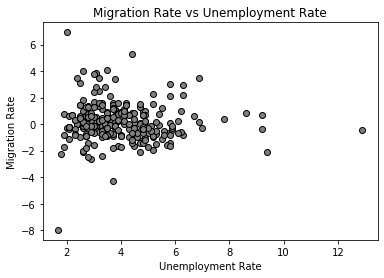

In [52]:
#Unemployment vs Flows
plt.scatter(employ_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_unemploy.png')

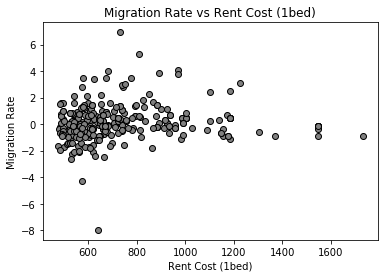

In [53]:
#Rent (1 bedroom) vs Flows
plt.scatter(rent_cost_1bed, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Rent Cost (1bed)')
plt.xlabel('Rent Cost (1bed)')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_1bedrent.png')

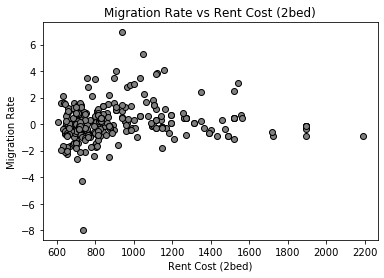

In [54]:
#Rent (2 bedroom) vs Flows
plt.scatter(rent_cost_2bed, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Rent Cost (2bed)')
plt.xlabel('Rent Cost (2bed)')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_2bedrent.png')

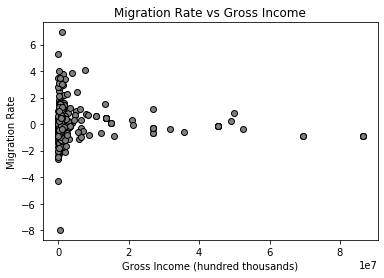

In [55]:
#Gross Income vs Flows
plt.scatter(agi_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Gross Income')
plt.xlabel('Gross Income (hundred thousands)')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_income.png')

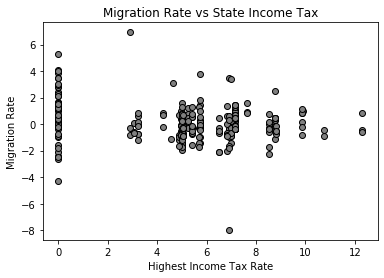

In [56]:
# Income Tax vs Flows
plt.scatter(state_tax_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs State Income Tax')
plt.xlabel('Highest Income Tax Rate')
plt.ylabel('Migration Rate')
#save the plot to an image file
plt.savefig('output_data/migration_tax.png')

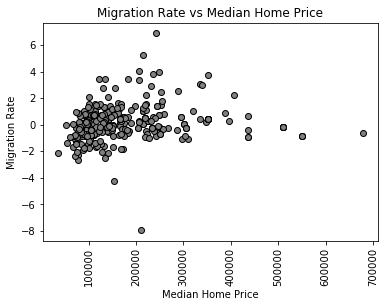

In [57]:
#inflows/outflows vs Median home price
plt.scatter(home_price_values, flow_values, marker='o', facecolors='grey', edgecolors='black')
plt.title('Migration Rate vs Median Home Price')
plt.xlabel('Median Home Price')
plt.ylabel('Migration Rate')
plt.xticks(rotation=90)
#save the plot to an image file
plt.savefig('output_data/migration_home.png')

The r-squared is: -0.04897964689399042


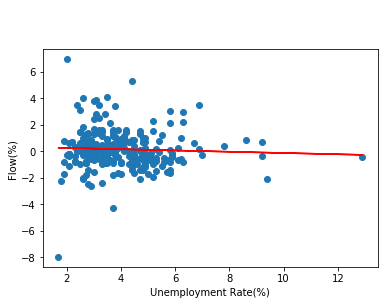

In [58]:
# Unemployment rate
x_values = sample_data['Unemployment Rate(%)']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Flow(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/migration_employ_regress.png')

The r-squared is: -0.08989019613018817


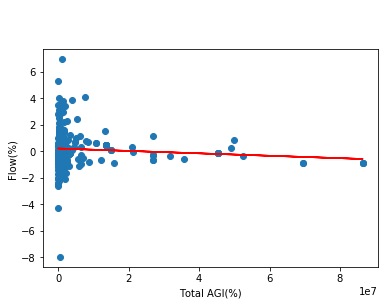

In [59]:
# Total AGI
x_values = sample_data['Total AGI']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Total AGI(%)')
plt.ylabel('Flow(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/migration_income_regress.png')

The r-squared is: -0.2167653702703857


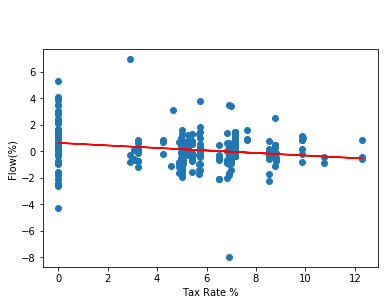

In [60]:
# Tax rate
x_values = sample_data['Highest Marginal Income Tax Rate (%)']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Tax Rate %')
plt.ylabel('Flow(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/migration_tax_regress.png')

The r-squared is: 0.14465503132993457


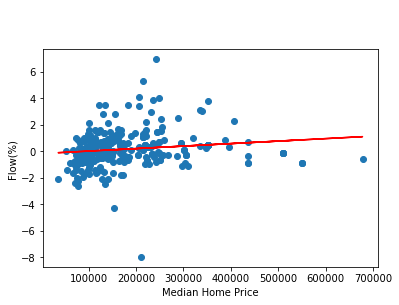

In [61]:
# Home Price
x_values = sample_data['Median Home Price 2017']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Median Home Price')
plt.ylabel('Flow(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/migration_home_regress.png')

The r-squared is: 0.08502931394007321


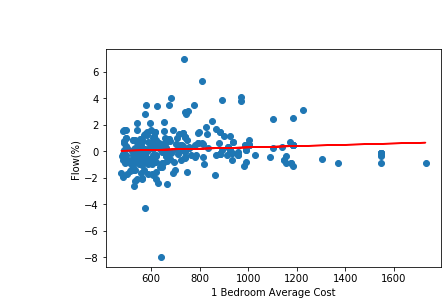

In [62]:
# 1 Bedroom rent cost 
x_values = sample_data['1 Bed Average']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('1 Bedroom Average Cost')
plt.ylabel('Flow(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/migration_1bed_regress.png')

The r-squared is: 0.09555009974224925


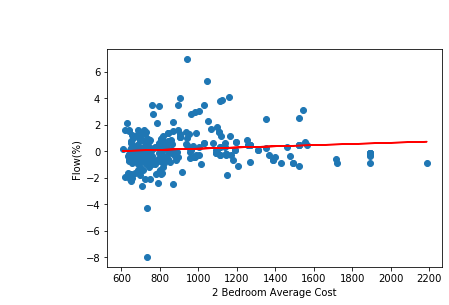

In [63]:
# 2 Bedroom rent cost 
x_values = sample_data['2 Bed Average']
y_values = sample_data['Flow(%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('2 Bedroom Average Cost')
plt.ylabel('Flow(%)')
print(f"The r-squared is: {rvalue}")
plt.savefig('output_data/migration_2bed_regress.png')